# 📈 Task 4 – Insight Visualization & Theme Metrics  
📘 Version: 2025-06-12

Generate comparative and per-bank visualizations of user feedback to surface the most common themes, their sentiment impact, and bank-specific performance differentials.

### This notebook covers:
- Loading enriched review data (`data/outputs/reviews_with_sentiment_themes.csv`) using `DataLoader`
- Computing per-theme metrics for each bank: frequency, average sentiment, average rating, composite score
- Visualizing insights with `PlotGenerator`:
  - 💬 **Bubble Chart** – Top themes by sentiment & volume
  - 📊 **Bar Plots** – Per-bank comparison of sentiment and rating
  - 📈 **Time Series** – Sentiment and review trends over time
- Supporting defensively written runner script: `scripts/visualize_insights.py`
- All code modularized in `src/visualization/` with unit tests in `tests/`


In [2]:
# ------------------------------------------------------------------------------
# 🛠 Ensure Notebook Runs from Project Root (for src/ imports to work)
# ------------------------------------------------------------------------------

import os
import sys

# If running from /notebooks/, move up to project root
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    print("📂 Changed working directory to project root")

# Add project root to sys.path so `src/` modules can be imported
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"✅ Added to sys.path: {project_root}")

# Optional: verify file presence to confirm we're in the right place
expected_path = "data/raw"
print(
    "📁 Output path ready"
    if os.path.exists(expected_path)
    else f"⚠️ Output path not found: {expected_path}"
)

📁 Output path ready


## 📥 Load Enriched Google Play Reviews Dataset

This step initializes the enriched reviews dataset that serves as the analytical backbone for Task 4 visualizations:

- Loads `reviews_with_sentiment_themes.csv` from the `data/outputs/` directory.
- Validates the presence of key columns: `review`, `rating`, `ensemble`, `bank`, `themes`, and `date`.
- Automatically parses the `themes` column back into Python lists using safe literal evaluation.
- Executed via a defensive, modular OOP wrapper `DataLoader` from `src.visualization.theme_data_loader`.

This guarantees schema conformity and prevents downstream failures by enforcing strict structural integrity at load time.


In [3]:
# ───────────────────────────────────────────────────────────────────────────────
# 🚀 Insight Analysis – Top Themes per Bank Using OOP Pipeline
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import required components
import pandas as pd  # For inline dataframe display in notebook
from src.visualization.theme_data_loader import (
    DataLoader,
)  # For loading the enriched data
from src.visualization.theme_metrics import (
    ThemeMetricsCalculator,
)  # For computing theme metrics

# 2️⃣ Load cleaned, enriched DataFrame from the output path
# File must contain: ['review', 'rating', 'ensemble', 'bank', 'themes', 'date']
data_path = "data/outputs/reviews_with_sentiment_themes.csv"  # Define input file path
loader = DataLoader(filepath=data_path)  # Instantiate the data loader
df = loader.load()  # Load and return the parsed DataFrame

# 3️⃣ Initialize the ThemeMetricsCalculator with the full DataFrame
metric_calculator = ThemeMetricsCalculator(
    df=df
)  # Instantiate calculator with enriched reviews

# 4️⃣ Compute per-bank metrics with defensive aggregation
metrics_cbe = metric_calculator.compute_for_bank("CBE")  # Theme metrics for CBE
metrics_boa = metric_calculator.compute_for_bank("BOA")  # Theme metrics for BOA
metrics_dashen = metric_calculator.compute_for_bank(
    "Dashen"
)  # Theme metrics for Dashen

# 5️⃣ Display the top 5 themes per bank for quick review
print("📌 CBE Top 5 Themes:")
display(metrics_cbe.head(5))  # Show top 5 themes by volume for CBE

print("📌 BOA Top 5 Themes:")
display(metrics_boa.head(5))  # Show top 5 themes by volume for BOA

print("📌 Dashen Top 5 Themes:")
display(metrics_dashen.head(5))  # Show top 5 themes by volume for Dashen

📌 CBE Top 5 Themes:


,themes,mentions,avg_sentiment,avg_rating,composite_score
4,Other,227,0.370766,4.273128,359.642641
0,Concise Feedback,135,0.622275,4.400000,369.631537
5,Performance,17,0.233648,4.058824,16.121688
3,Functionality,10,0.147693,2.700000,3.987702
1,Connection Issues,9,-0.016685,2.444444,-0.367064


📌 BOA Top 5 Themes:


,themes,mentions,avg_sentiment,avg_rating,composite_score
6,Other,227,0.159706,3.176211,115.148183
1,Concise Feedback,115,0.335796,3.469565,133.982448
7,Performance,23,-0.204310,2.043478,-9.602569
9,Stability & Bugs,20,-0.260440,1.650000,-8.594524
4,Functionality,19,-0.253004,1.684211,-8.096115


📌 Dashen Top 5 Themes:


,themes,mentions,avg_sentiment,avg_rating,composite_score
6,Other,201,0.432070,4.527363,393.183719
1,Concise Feedback,104,0.616930,4.432692,284.404637
7,Performance,63,0.394270,4.301587,106.847052
4,Functionality,49,0.522877,4.469388,114.510089
8,Security & Trust,21,0.614199,4.904762,63.262452


## 📊 Visualize Star Rating Distributions per Bank

This section compares how users rated each fintech app (CBE, BOA, Dashen) based on their submitted reviews:

- Loads the enriched dataset (`reviews_with_sentiment_themes.csv`) via the `DataLoader` wrapper.
- Uses the `PlotGenerator` class to modularly render rating distribution histograms.
- Displays normalized counts of 1–5 star ratings for each bank.
- Designed to highlight sentiment skew and rating polarity between banks.

This diagnostic helps identify outlier institutions with excessive low or high ratings, offering an early signal of UX or service quality issues.


c:\Users\admin\Documents\GIT Repositories\b5w2-customer-ux-analytics-challenge\src\visualization\plot_generator.py:73: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\admin\Documents\GIT Repositories\b5w2-customer-ux-analytics-challenge\customer-ux-challenge\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


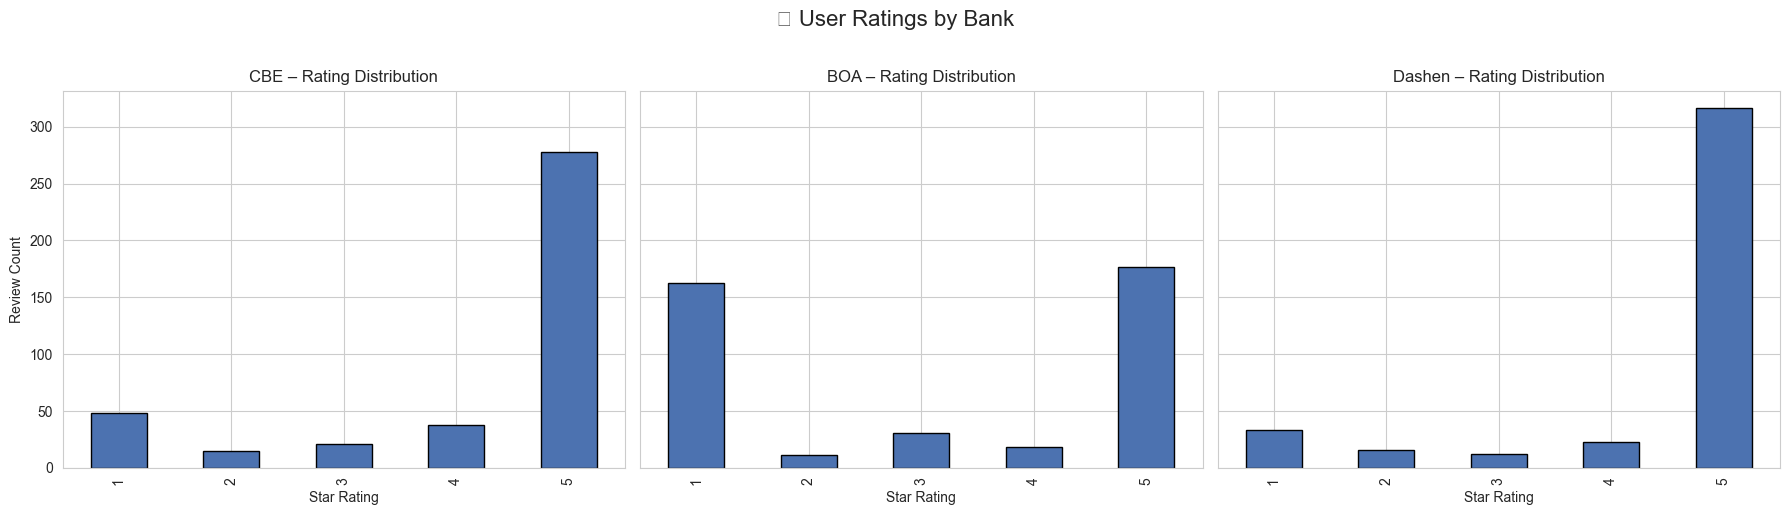

In [4]:
# ───────────────────────────────────────────────────────────────────────────────
# 📊 Rating Distributions – Compare How Banks Are Rated
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import relevant modules from your src.visualization pipeline
from src.visualization.theme_data_loader import DataLoader  # For data loading
from src.visualization.plot_generator import PlotGenerator  # For visual generation

# 2️⃣ Define the CSV path and load the cleaned, enriched DataFrame
data_path = "data/outputs/reviews_with_sentiment_themes.csv"  # Path to the CSV
df = DataLoader(filepath=data_path).load()  # Load and return the validated DataFrame

# 3️⃣ Instantiate the PlotGenerator with the loaded data
plotter = PlotGenerator(df=df)  # Initialize the plotting class

# 4️⃣ Define which banks to visualize (can be dynamic)
banks_to_plot = ["CBE", "BOA", "Dashen"]  # List of banks in scope

# 5️⃣ Generate the rating distribution plot for all specified banks
plotter.plot_rating_distribution(banks=banks_to_plot)  # Modularized chart generation

## 📈 Sentiment Trends – 7-Day Rolling Mean per Bank

This section reveals how average user sentiment evolves over time across the three banks:

- Loads `reviews_with_sentiment_themes.csv` via the `DataLoader` class.
- Computes 7-day rolling mean of `ensemble` sentiment scores per bank.
- Uses `PlotGenerator.plot_sentiment_trends()` to render time series plots.
- Designed to expose temporal sentiment volatility, customer frustration spikes, or recovery periods.

This view is crucial for diagnosing app updates, service outages, or marketing campaigns that may have affected user perception.


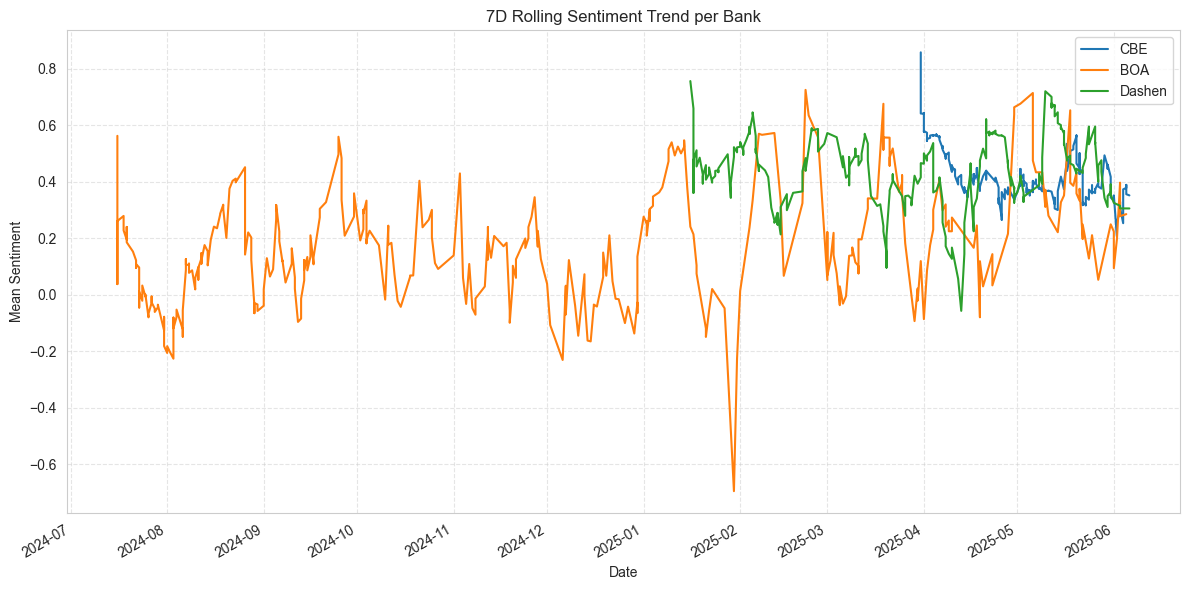

In [6]:
# ───────────────────────────────────────────────────────────────────────────────
# 📈 Sentiment Trends – 7-Day Rolling Mean of Ensemble Sentiment
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import required components
from src.visualization.theme_data_loader import DataLoader  # For CSV loading
from src.visualization.plot_generator import PlotGenerator  # For plot abstraction

# 2️⃣ Set file path and load enriched, themed data
csv_path = "data/outputs/reviews_with_sentiment_themes.csv"  # Path to data
df = DataLoader(filepath=csv_path).load()  # Returns DataFrame with parsed themes

# 3️⃣ Instantiate the PlotGenerator class using the loaded DataFrame
plotter = PlotGenerator(df=df)  # Initialize plotting logic

# 4️⃣ Generate the rolling sentiment trend plot (defaults to 7-day window)
plotter.plot_sentiment_trends()  # Generates and shows the trend plot

## 🌡️ Theme vs. Average Rating – Heatmap by Bank

Visualizes how different review themes correspond to average star ratings across banks:

- Loads the enriched dataset (`reviews_with_sentiment_themes.csv`) via `DataLoader`.
- Groups reviews by bank and theme, then calculates average `rating` for each pair.
- Generates a heatmap using `PlotGenerator.plot_theme_rating_heatmap()`.
- Supports multi-bank comparison (default: CBE, BOA, Dashen).

This diagnostic reveals which themes are consistently associated with high or low satisfaction, helping teams prioritize feature fixes or communication strategies.


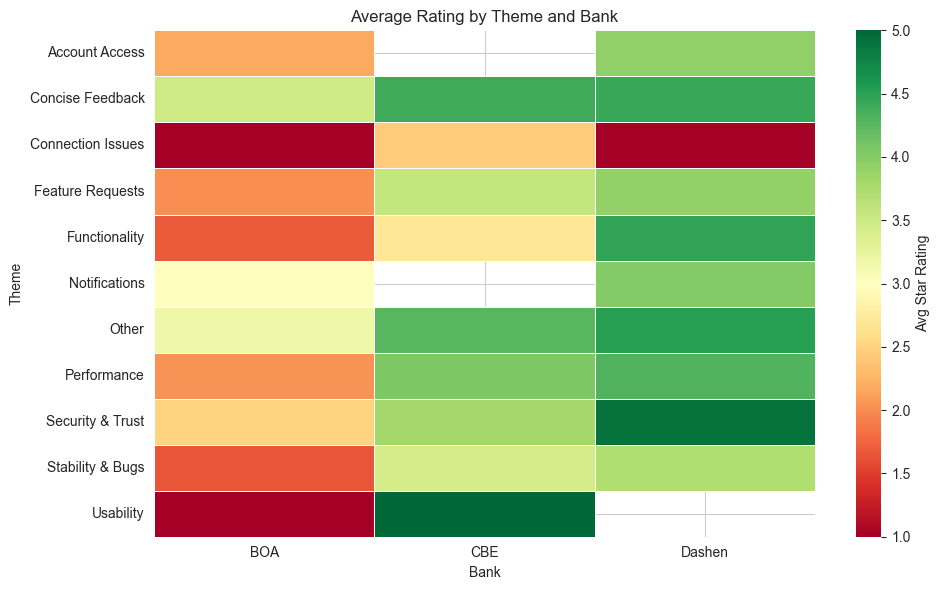

In [7]:
# ───────────────────────────────────────────────────────────────────────────────
# 📊 Heatmap – Theme vs. Average Rating per Bank
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import required components from your visualization module suite
from src.visualization.theme_data_loader import (
    DataLoader,
)  # For loading enriched reviews
from src.visualization.plot_generator import PlotGenerator  # For generating all plots

# 2️⃣ Define the file path to the enriched data
csv_path = (
    "data/outputs/reviews_with_sentiment_themes.csv"  # Path to themed review data
)

# 3️⃣ Load the data using the robust DataLoader
df = DataLoader(filepath=csv_path).load()  # Parses 'themes' and validates columns

# 4️⃣ Initialize the PlotGenerator with the loaded DataFrame
plotter = PlotGenerator(df=df)  # Ready to generate visualizations

# 5️⃣ Generate and display the Theme vs. Avg Rating heatmap
plotter.plot_theme_rating_heatmap(banks=["CBE", "BOA", "Dashen"])  # Default order

## 🔥 Complaint Clusters – Heatmap of Negative Sentiment Themes

Highlights which themes are most associated with negative experiences across banks:

- Loads enriched dataset (`reviews_with_sentiment_themes.csv`) using the `DataLoader`.
- Filters for reviews with ensemble sentiment scores below 0 (configurable threshold).
- Groups negative reviews by bank and theme, counting complaint volume per cluster.
- Uses `PlotGenerator.plot_negative_complaint_heatmap()` to visualize clusters.

This heatmap helps spotlight which functional areas (e.g., login, payments, UX) are most complaint-prone—supporting targeted product or ops interventions.


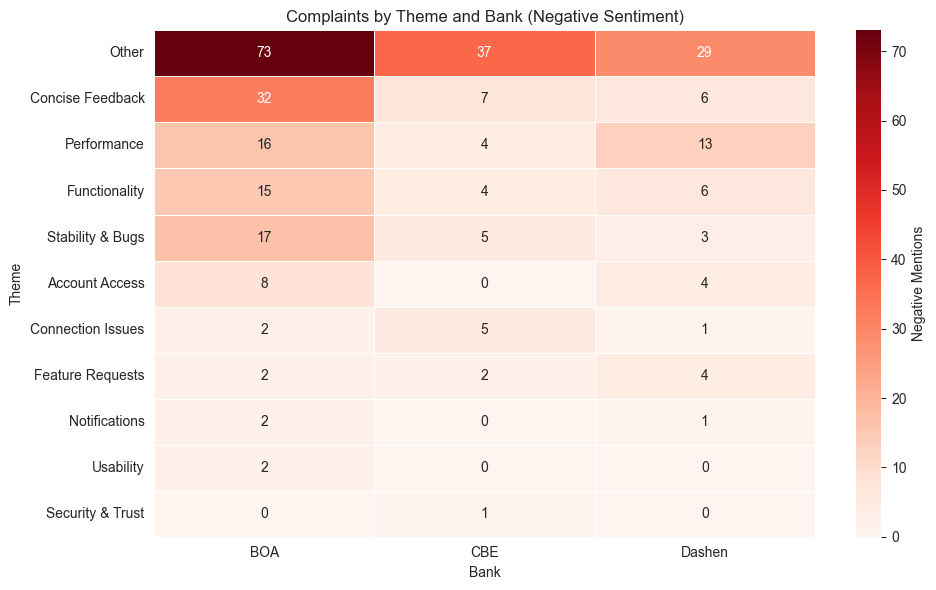

In [8]:
# ───────────────────────────────────────────────────────────────────────────────
# 🔥 Complaint Cluster Heatmap – Negative Sentiment
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import modular components
from src.visualization.theme_data_loader import (
    DataLoader,
)  # Loads and parses review data
from src.visualization.plot_generator import PlotGenerator  # Handles visualizations

# 2️⃣ Specify the file path to enriched review dataset
csv_path = (
    "data/outputs/reviews_with_sentiment_themes.csv"  # Can update dynamically later
)

# 3️⃣ Load the cleaned, themed reviews DataFrame
df = DataLoader(filepath=csv_path).load()  # Handles column checks and theme parsing

# 4️⃣ Initialize the plot generator
plotter = PlotGenerator(df=df)  # Encapsulates all supported UX visualizations

# 5️⃣ Generate the heatmap for complaint clusters (using ensemble sentiment < 0)
plotter.plot_negative_complaint_heatmap(sentiment_col="ensemble", threshold=0.0)

## ☁️ Word Clouds – Most Frequent Words per Bank

Visualize the most commonly used words in user reviews, segmented by bank:

- Loads `reviews_with_sentiment_themes.csv` via the `DataLoader` class.
- Targets the `normalized_review` column to remove casing and punctuation noise.
- Generates word clouds per bank to show dominant vocabulary and recurring themes.
- Supports custom stopword filtering to remove generic fintech/app terms.

Word clouds provide intuitive, qualitative insight into user concerns, praise, and expectations—supporting brand perception analysis and UX discovery.


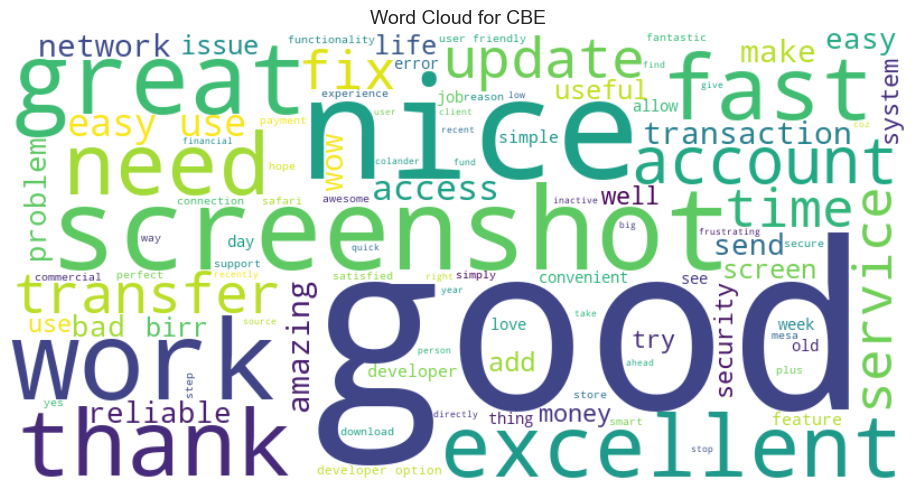

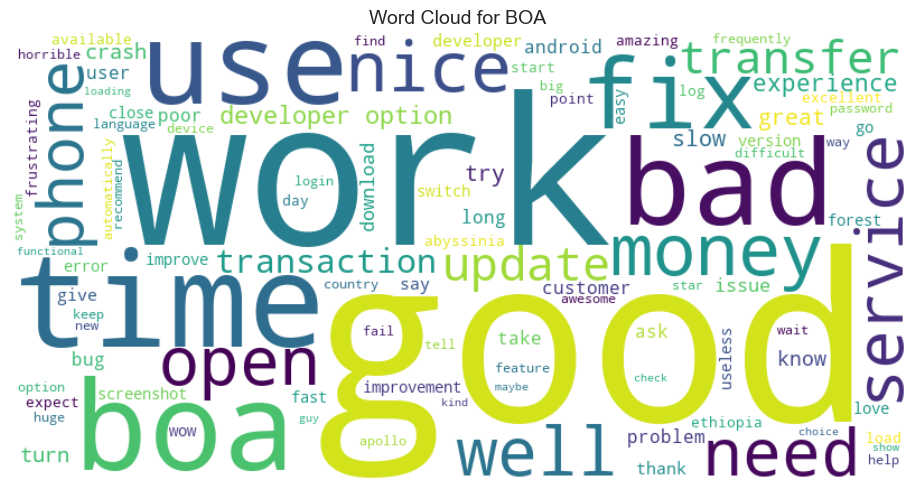

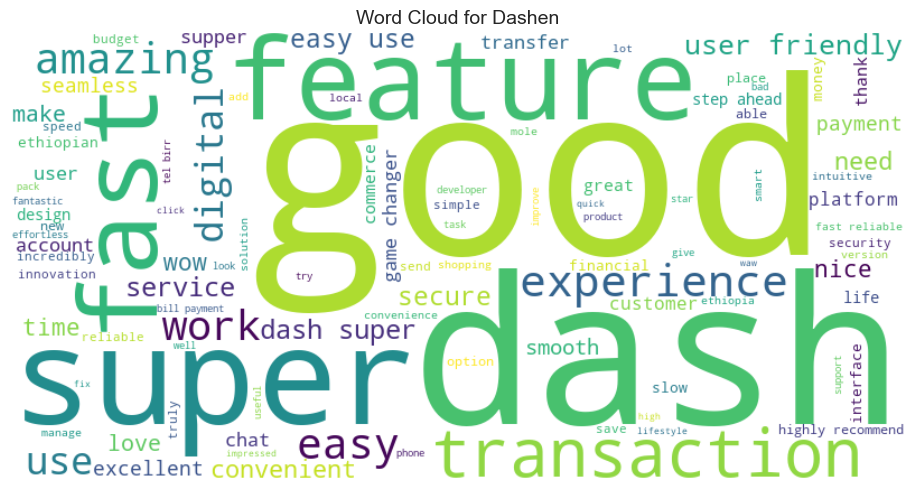

In [10]:
# ───────────────────────────────────────────────────────────────────────────────
# ☁️ Word Clouds – Most Frequent Words per Bank
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import class-based modules
from src.visualization.theme_data_loader import (
    DataLoader,
)  # Loads the enriched review file
from src.visualization.plot_generator import PlotGenerator  # OOP plotting engine

# 2️⃣ Define the enriched review CSV file path
csv_path = "data/outputs/reviews_with_sentiment_themes.csv"  # Modular entry point

# 3️⃣ Load the cleaned DataFrame (includes parsing for 'themes' and validations)
df = DataLoader(filepath=csv_path).load()

# 4️⃣ Initialize the visualization engine
plotter = PlotGenerator(df=df)

# 5️⃣ Define extra stopwords to filter out generic terms from clouds
custom_stopwords = {"app", "bank", "banking", "mobile", "application"}

# 6️⃣ Generate word clouds per bank using filtered vocabulary
plotter.plot_word_clouds(
    text_col="normalized_review",  # Target the cleaned review column
    bank_col="bank",  # Use 'bank' to separate clouds
    additional_stopwords=custom_stopwords,  # Custom filter list for better signal
)

## 🛠️ Negative Feature Request Bar Chart – Volume by Theme per Bank

Highlights areas where users express dissatisfaction related to feature gaps, UX, or app functionality:

- Loads the enriched review dataset via `DataLoader`, ensuring theme parsing.
- Filters reviews with negative ensemble sentiment (`< 0.0`) as potential complaints.
- Aggregates volume of flagged reviews by bank and candidate feature themes (e.g., UI/UX, Functionality).
- Outputs a bar chart for quick comparative diagnostics.

This diagnostic plot is useful for product and UX teams to prioritize roadmap items based on user frustration hotspots and perceived capability gaps.


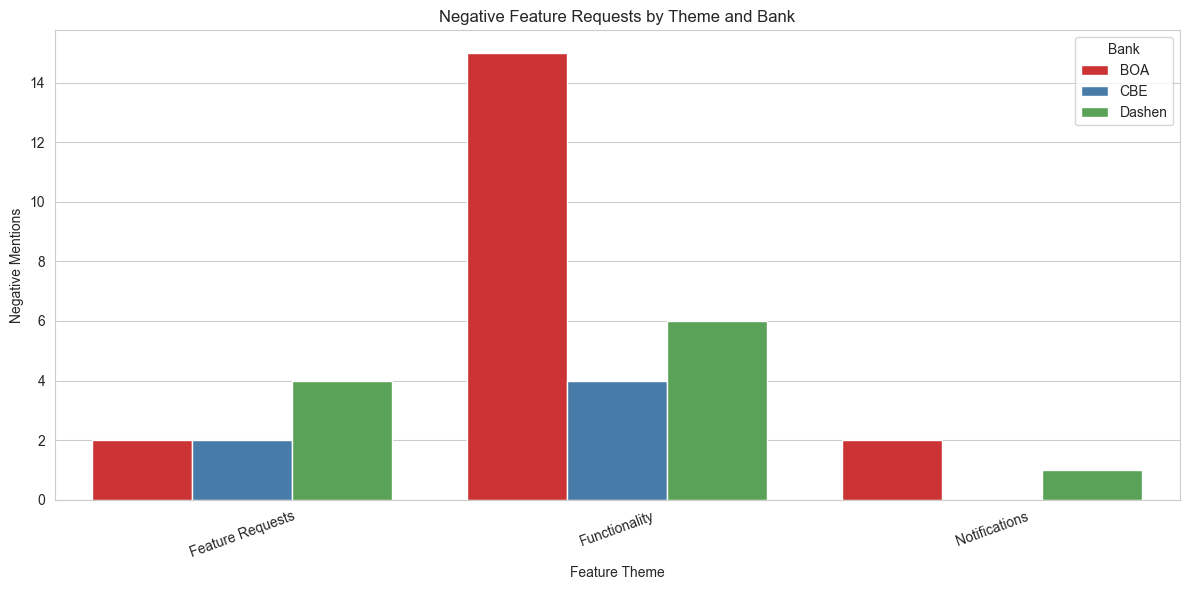

In [11]:
# ───────────────────────────────────────────────────────────────────────────────
# 🛠️ Negative Feature Request Bar Chart – Volume by Theme per Bank
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import the necessary module classes
from src.visualization.theme_data_loader import DataLoader  # Validates + parses CSV
from src.visualization.plot_generator import PlotGenerator  # Contains all plot logic

# 2️⃣ Load the enriched, themed dataset from disk (themes parsed)
csv_path = "data/outputs/reviews_with_sentiment_themes.csv"
df = DataLoader(filepath=csv_path).load()

# 3️⃣ Define candidate themes you expect to capture as feature requests
candidate_feature_themes = [
    "Feature Requests",
    "Functionality",
    "UI/UX",
    "Notifications",
]

# 4️⃣ Initialize the PlotGenerator with the cleaned DataFrame
plotter = PlotGenerator(df=df)

# 5️⃣ Generate the bar chart of negative-sentiment feature request volume
plotter.plot_negative_feature_requests(
    candidate_themes=candidate_feature_themes,
    sentiment_col="ensemble",  # Use ensemble score for negativity
    threshold=0.0,  # Threshold below which sentiment is flagged as negative
)

## 💎 Bubble Chart – Occurrence vs. Rating for a Key Theme

Provides a targeted view of how users rate a specific app theme across banks:

- Loads the enriched, themed dataset using `DataLoader`.
- Focuses on one `key_theme` (e.g., "Functionality") across all or selected banks.
- Computes average rating (bubble Y-axis), volume of mentions (bubble size), and displays per-bank comparison.
- Useful for diagnosing satisfaction levels for specific UX or feature clusters.

This visualization helps teams assess how central themes perform in terms of both frequency and perceived quality across institutions.


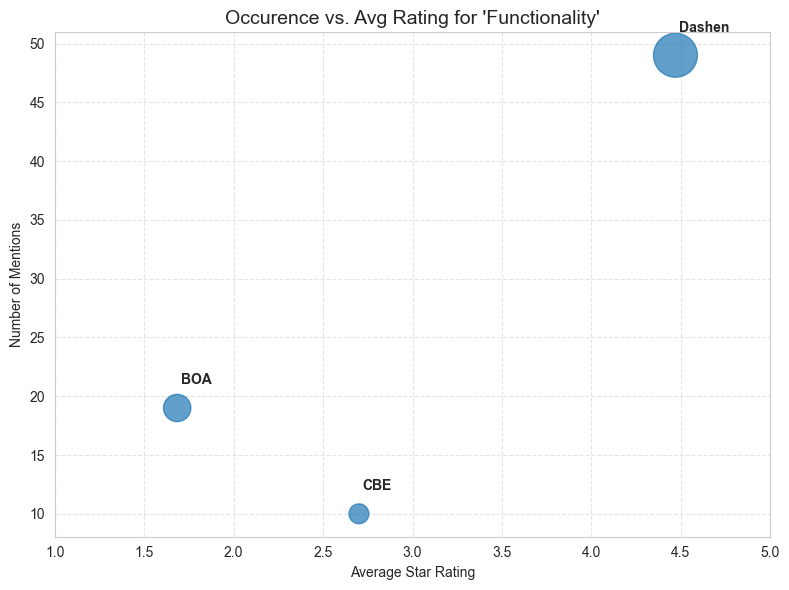

In [13]:
# ───────────────────────────────────────────────────────────────────────────────
# 💎 Bubble Chart – Occurrence vs. Rating for a Key Theme
# ───────────────────────────────────────────────────────────────────────────────

# 1️⃣ Import the required classes
from src.visualization.theme_data_loader import DataLoader  # For safe CSV loading
from src.visualization.plot_generator import (
    PlotGenerator,
)  # For bubble chart generation

# 2️⃣ Load cleaned & themed reviews data
csv_path = "data/outputs/reviews_with_sentiment_themes.csv"
df = DataLoader(filepath=csv_path).load()

# 3️⃣ Define the theme you want to inspect (exact match required)
key_theme = "Functionality"

# 4️⃣ Specify the banks to include in comparison
banks = ["CBE", "BOA", "Dashen"]

# 5️⃣ Initialize the plotting engine
plotter = PlotGenerator(df=df)

# 6️⃣ Plot the bubble chart for this key theme across banks
plotter.plot_bubble_chart(key_theme=key_theme, banks=banks)